In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing data set
data=pd.read_csv("laptop_data.csv")

In [4]:
data.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
data.shape

(1303, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
# Checking null values
data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [8]:
#There is one column which not useful that's why dropping it
data = data.drop(columns ="Unnamed: 0")

In [9]:
data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
587,Lenovo,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,12GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.4kg,89137.44
600,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.84kg,64948.32
690,Acer,Notebook,14.0,1366x768,Intel Celeron Dual Core 3855U 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 510,Chrome OS,1.45kg,19980.00
260,Dell,Notebook,17.3,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.8kg,60845.76
477,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,180GB SSD,Intel HD Graphics 620,Windows 10,1.7kg,72673.92


In [10]:
# Checking duplicate
data.duplicated().sum()

29

In [11]:
# removing duplicate
data = data.drop_duplicates()

In [12]:
#removing KG from Weight column and GB from Ram Column
data["Ram"] = data["Ram"].str.replace("GB","")
data["Weight"] = data["Weight"].str.replace("kg","")

In [13]:
data.sample(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1259,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.4,65481.1200
378,Asus,Notebook,14.0,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.5,15238.0800
1116,Lenovo,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,16,256GB SSD + 1.0TB Hybrid,Nvidia GeForce GTX 980M,Windows 10,4.6,146519.4672


In [14]:
data["Company"].value_counts()

Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

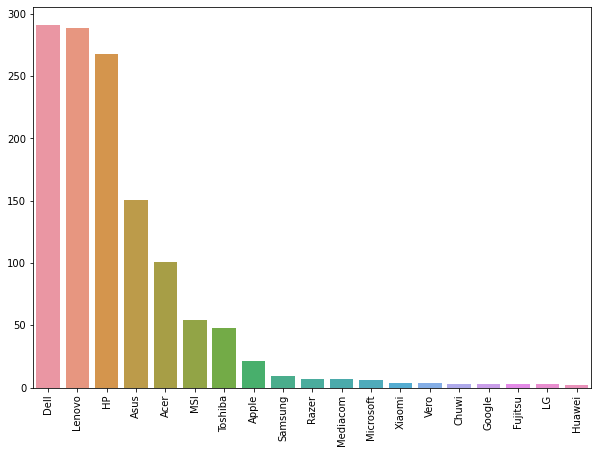

In [15]:
plt.figure(figsize = (10,7))
sns.barplot(x = data["Company"].value_counts().index,y =data["Company"].value_counts().values )
plt.xticks(rotation = "vertical");

### Observation:- Dell, Lenovo, HP, Asus, Asus these company's laptops have been sold more 

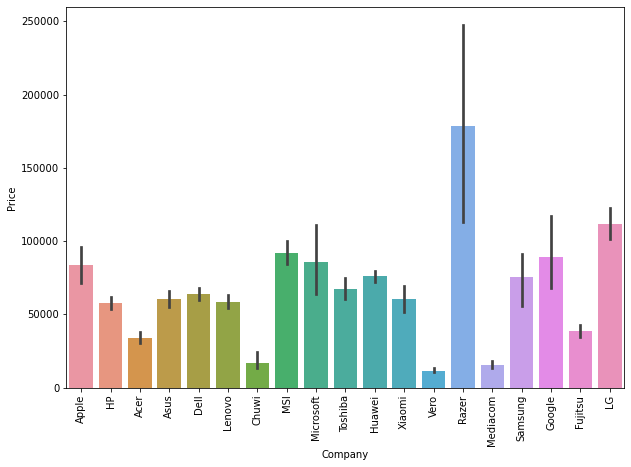

In [16]:
plt.figure(figsize = (10,7))
sns.barplot(x = data["Company"],y = data["Price"])
plt.xticks(rotation = "vertical");

### Observation:- Razer, LG, MSI, Apple these company's laptop price is high

In [17]:
data["TypeName"].value_counts()

Notebook              706
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            29
Netbook                23
Name: TypeName, dtype: int64

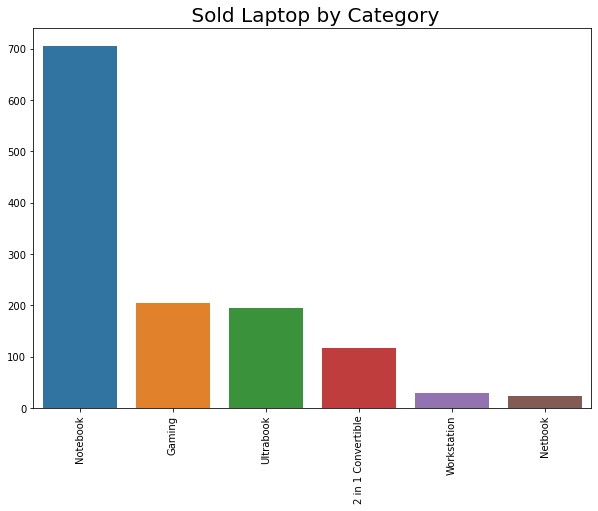

In [18]:
plt.figure(figsize = (10,7))
sns.barplot(x = data["TypeName"].value_counts().index,y =data["TypeName"].value_counts().values )
plt.xticks(rotation = "vertical");
plt.title(" Sold Laptop by Category",fontsize = 20);

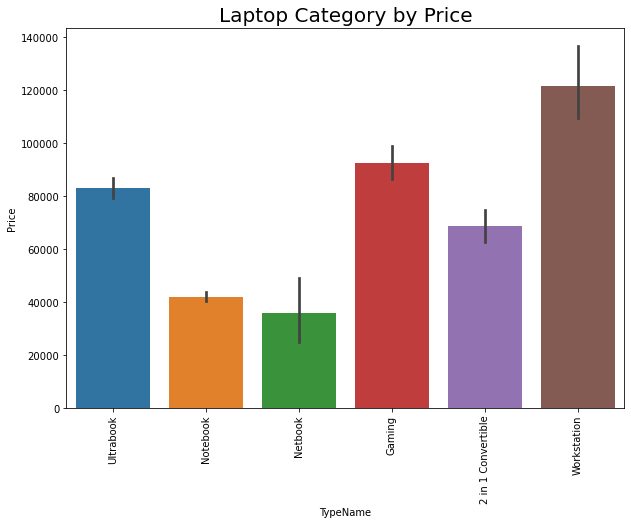

In [19]:
plt.figure(figsize = (10,7))
sns.barplot(x = data["TypeName"],y = data["Price"])
plt.xticks(rotation = "vertical");
plt.title("Laptop Category by Price",fontsize = 20);

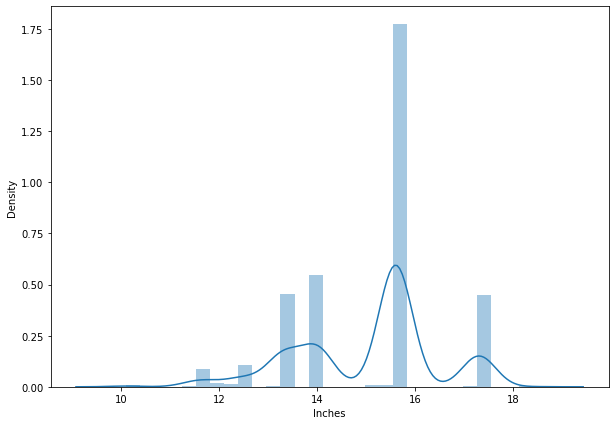

In [20]:
plt.figure(figsize = (10,7))
sns.distplot(data["Inches"]);

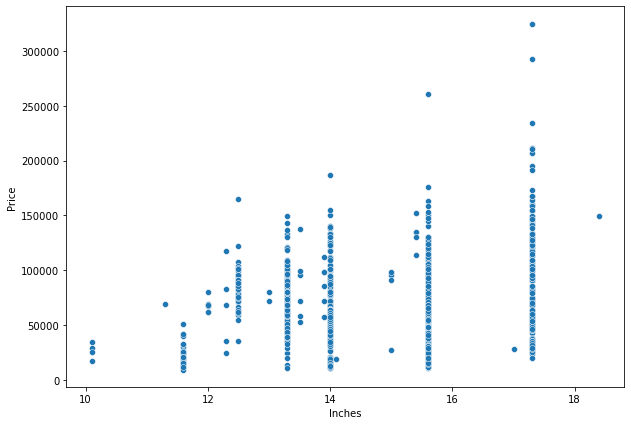

In [21]:
plt.figure(figsize = (10,7))
sns.scatterplot(x = data["Inches"], y=data["Price"]);

In [22]:
data["ScreenResolution"].value_counts()

Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscreen 3200x1800    

### There are muliple category in Screen Resolution column that's why i am going to pull information from screen resolution column and create another column

In [23]:
# Creating column to know weather screen is touchscreen or not
data["Touch_Screen"] = data["ScreenResolution"].apply(lambda x:1 if "Touchscreen" in x else 0)

In [24]:
data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen
269,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,2.05,46886.4000,0
353,HP,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia Quadro M1200,Windows 10,2.6,92615.0256,0
1152,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,1TB HDD,AMD Radeon R5 M330,No OS,2.32,31914.7200,0
1258,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 6500U 2.5GHz,8,1.0TB Hybrid,AMD Radeon R5 M330,Windows 7,2.32,47685.6000,0
395,HP,Ultrabook,15.6,Full HD 1920x1080,AMD A9-Series 9420 3GHz,4,256GB SSD,AMD Radeon 520,Windows 10,1.91,26586.7200,0


In [25]:
data["Touch_Screen"].value_counts()

0    1086
1     188
Name: Touch_Screen, dtype: int64

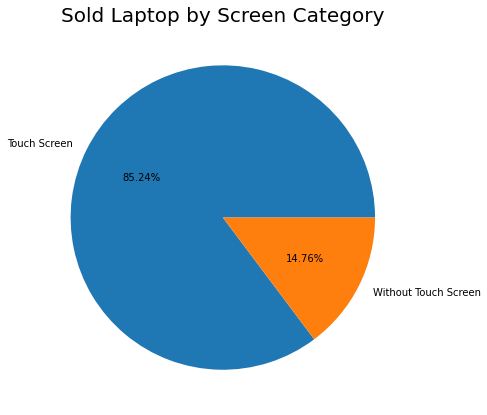

In [26]:
plt.figure(figsize = (10,7))
plt.pie(data["Touch_Screen"].value_counts(),labels = ["Touch Screen","Without Touch Screen"], autopct = "%.2f%%")
plt.title("Sold Laptop by Screen Category",fontsize = 20);

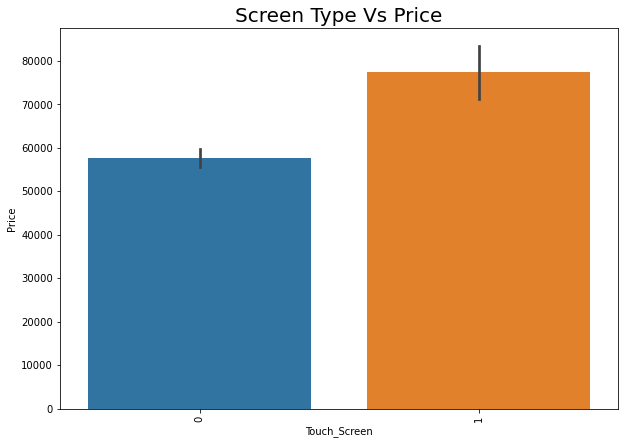

In [27]:
plt.figure(figsize = (10,7))
sns.barplot(x = data["Touch_Screen"],y = data["Price"])
plt.xticks(rotation = "vertical");
plt.title("Screen Type Vs Price",fontsize = 20);

### Observation :-Touch Screen laptop's price are high

In [28]:
# Creating column to know weather screen is IPS Enabled or not
data["IPS"] = data["ScreenResolution"].apply(lambda x:1 if "IPS" in x else 0)

In [29]:
data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen,IPS
852,Dell,Notebook,17.3,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R7 M445,Linux,2.83,46087.20,0,0
868,Acer,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.56,48058.56,0,1
1239,Lenovo,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.4,79866.72,0,1
1205,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,AMD Radeon R7 M445,Windows 10,2.36,47365.92,0,0
663,HP,Notebook,15.6,1920x1080,Intel Core i3 6006U 2GHz,6,1TB HDD,AMD Radeon R5 M430,Windows 10,2.04,28717.92,0,0


In [30]:
data["IPS"].value_counts()

0    917
1    357
Name: IPS, dtype: int64

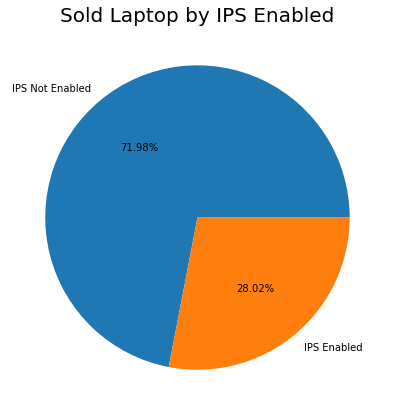

In [31]:
plt.figure(figsize = (10,7))
plt.pie(data["IPS"].value_counts(),labels = ["IPS Not Enabled","IPS Enabled"], autopct = "%.2f%%")
plt.title("Sold Laptop by IPS Enabled",fontsize = 20);

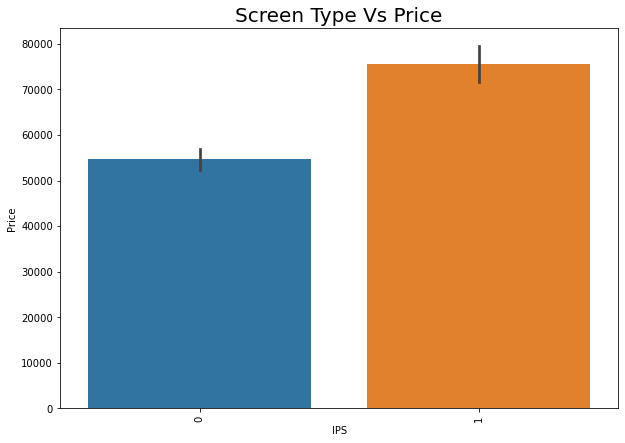

In [32]:
plt.figure(figsize = (10,7))
sns.barplot(x = data["IPS"],y = data["Price"])
plt.xticks(rotation = "vertical");
plt.title("Screen Type Vs Price",fontsize = 20);


### Observation :- IPS enabled screen laptop's price are high

In [33]:
#Fetching Screen Size from Screen Resolution column
new = data['ScreenResolution'].str.split('x',n=1,expand=True)

In [34]:
data["res_width"] = new[0]
data["res_height"] = new[1]

In [35]:
data['res_width'] = data['res_width'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [36]:
# Changing data types of columns
data["Ram"] = data["Ram"].astype("int64")
data["Weight"] = data["Weight"].astype("float64")
data["Price"] = data["Price"].astype("int64")
data["res_width"] = data["res_width"].astype("int64")
data["res_height"] = data["res_height"].astype("int64")

In [37]:
data.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                object
Weight              float64
Price                 int64
Touch_Screen          int64
IPS                   int64
res_width             int64
res_height            int64
dtype: object

### We have resolution width, resolution height and screen size, now we may calculate pixel per incehes, in other words pixel density using formula [square root of (square of width+ square of length) / Screen Size ]

In [38]:
data["PPI"] = ((data["res_width"]**2) + (data["res_height"]**2))**0.5/data["Inches"].astype("float")

In [39]:
# Checking co-relation with price
data.corr()["Price"]

Inches          0.066990
Ram             0.740106
Weight          0.212192
Price           1.000000
Touch_Screen    0.188630
IPS             0.250357
res_width       0.552074
res_height      0.548111
PPI             0.469538
Name: Price, dtype: float64

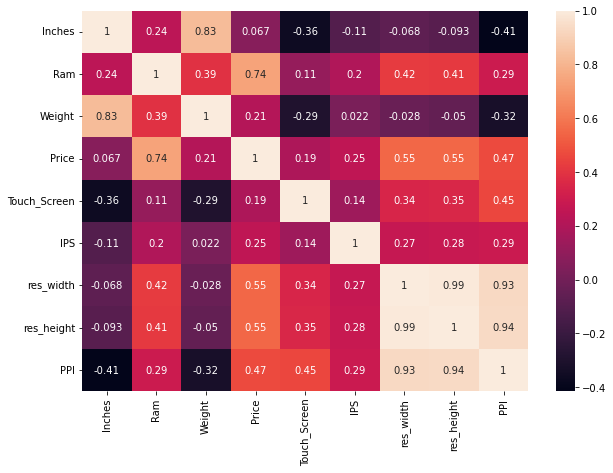

In [40]:
# Checking co-relation between independent column
plt.figure(figsize = (10,7))
sns.heatmap(data.corr(),annot= True);

### As we may see there is high co relation between res_width, res_height and PPI, that's why removing res_width and res_height for pretending multicollinearity

In [41]:
data = data.drop(["res_width","res_height"],axis = 1)

# All the informations have been pulled from ScreenResolution columnc to other seperate column that's why removing this as well
data = data.drop("ScreenResolution",axis = 1)

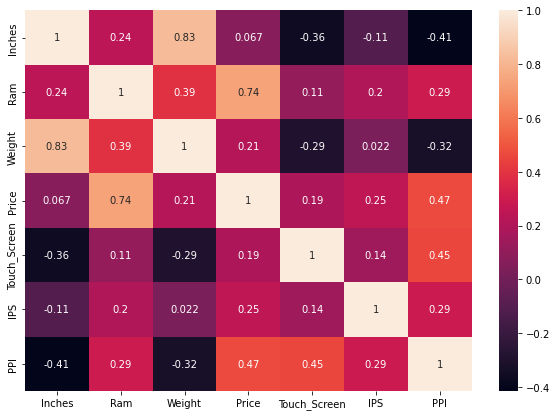

In [42]:
plt.figure(figsize = (10,7))
sns.heatmap(data.corr(),annot= True);

In [43]:
data["Cpu"].value_counts()

Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: Cpu, Length: 118, dtype: int64

### There are so many categories in Cpu column that's why pulling  info. in seperate column

In [44]:
data["Cpu Name"] = data["Cpu"].apply(lambda x : " ".join(x.split()[0:3]))

In [45]:
data["Cpu Name"].value_counts()

Intel Core i7               515
Intel Core i5               423
Intel Core i3               134
Intel Celeron Dual           69
Intel Pentium Quad           27
Intel Core M                 17
AMD A9-Series 9420           12
AMD A6-Series 9220            8
Intel Celeron Quad            8
AMD A12-Series 9720P          7
Intel Atom x5-Z8350           5
Intel Atom x5-Z8550           4
AMD A8-Series 7410            4
Intel Pentium Dual            3
AMD Ryzen 1700                3
Intel Atom X5-Z8350           2
Intel Xeon E3-1535M           2
AMD A9-Series A9-9420         2
AMD E-Series 7110             2
AMD A10-Series 9620P          2
AMD A10-Series 9600P          2
AMD A6-Series A6-9220         2
Intel Xeon E3-1505M           2
AMD E-Series E2-9000e         2
AMD A10-Series A10-9620P      2
Intel Atom x5-Z8300           1
AMD E-Series 9000             1
Samsung Cortex A72&A53        1
AMD FX 8800P                  1
AMD A4-Series 7210            1
AMD A12-Series 9700P          1
AMD A6-S

In [46]:
def fetchcpu (text):
    if text == "Intel Core i7" or text == "Intel Core i5" or text == "Intel Core i3":
        return text
    else:
        if text.split()[0] == "Intel":
            return "Other Intel Processor"
        else:
            return "AMD Processor"

In [47]:
data["Cpu Brand"] = data["Cpu Name"].apply(fetchcpu)

In [48]:
data.sample(4)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch_Screen,IPS,PPI,Cpu Name,Cpu Brand
1097,MSI,Gaming,17.3,Intel Core i7 6700HQ 2.6GHz,8,256GB SSD,Nvidia GeForce GTX 965M,Windows 10,2.60,85194,0,0,127.335675,Intel Core i7,Intel Core i7
543,Acer,Gaming,15.6,Intel Core i5 7300HQ 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.40,42517,0,0,141.211998,Intel Core i5,Intel Core i5
1228,Lenovo,Gaming,15.6,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,54825,1,1,141.211998,Intel Core i7,Intel Core i7
1138,MSI,Gaming,17.3,Intel Core i7 6820HQ 2.7GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,3.78,127818,0,0,127.335675,Intel Core i7,Intel Core i7


In [49]:
data["Cpu Brand"].value_counts()

Intel Core i7            515
Intel Core i5            423
Other Intel Processor    141
Intel Core i3            134
AMD Processor             61
Name: Cpu Brand, dtype: int64

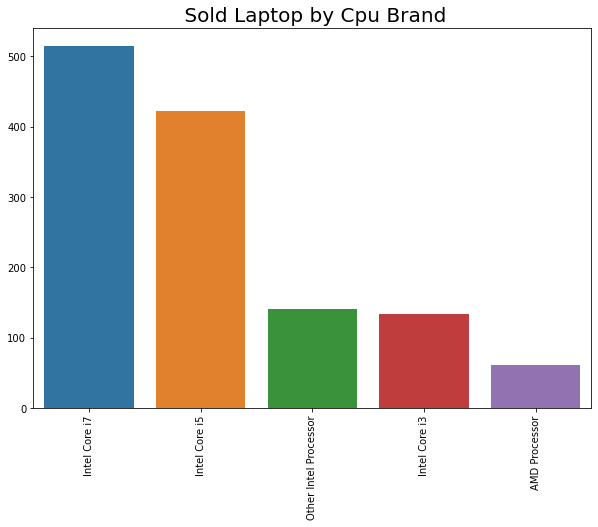

In [50]:
plt.figure(figsize = (10,7))
sns.barplot(x = data["Cpu Brand"].value_counts().index,y =data["Cpu Brand"].value_counts().values )
plt.xticks(rotation = "vertical");
plt.title(" Sold Laptop by Cpu Brand",fontsize = 20);

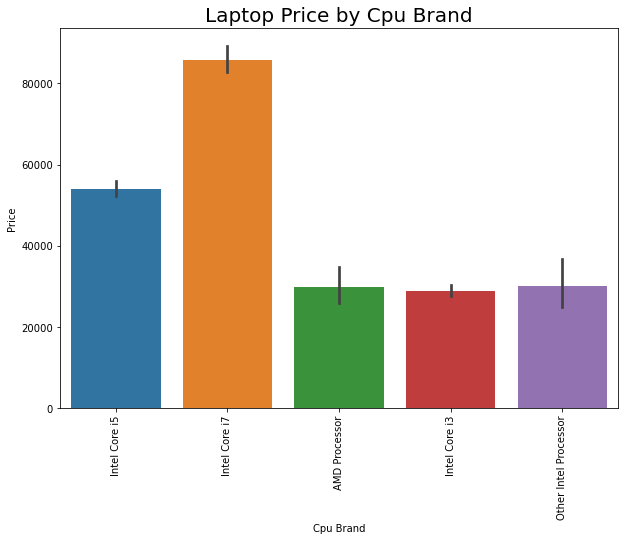

In [51]:
plt.figure(figsize = (10,7))
sns.barplot(x = data["Cpu Brand"],y =data["Price"])
plt.xticks(rotation = "vertical");
plt.title("Laptop Price by Cpu Brand",fontsize = 20);

In [52]:
data = data.drop(["Cpu","Cpu Name"],axis = 1)

In [53]:
data["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

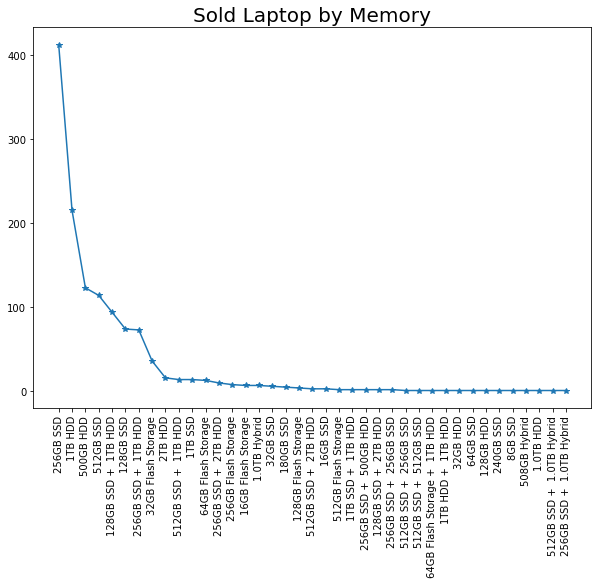

In [54]:
plt.figure(figsize = (10,7))
plt.plot(data["Memory"].value_counts().index,data["Memory"].value_counts().values,marker = "*")
plt.xticks(rotation = "vertical")
plt.title("Sold Laptop by Memory",fontsize = 20);

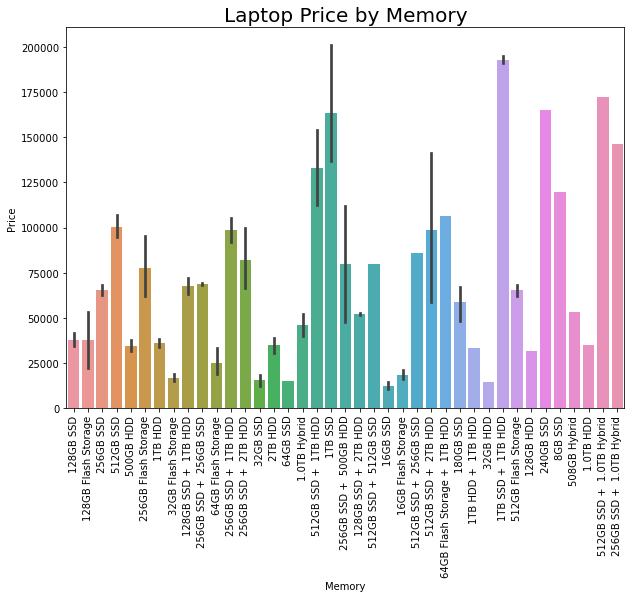

In [55]:
plt.figure(figsize = (10,7))
sns.barplot(x = data["Memory"],y =data["Price"])
plt.xticks(rotation = "vertical");
plt.title("Laptop Price by Memory",fontsize = 20);

In [56]:
data["Gpu"].value_counts()

Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

### There are so many categories in Gpu as well column that's why pulling  info. in seperate column

In [57]:
data["Gpu brand"] = data["Gpu"].apply(lambda x :x.split()[0])

In [58]:
data["Gpu brand"].value_counts()

Intel     703
Nvidia    396
AMD       174
ARM         1
Name: Gpu brand, dtype: int64

In [59]:
# There is only one entry is there regarding ARM That's why dropping that row
data = data[data["Gpu brand"]!="ARM"]

In [60]:
data = data.drop("Gpu",axis = 1)

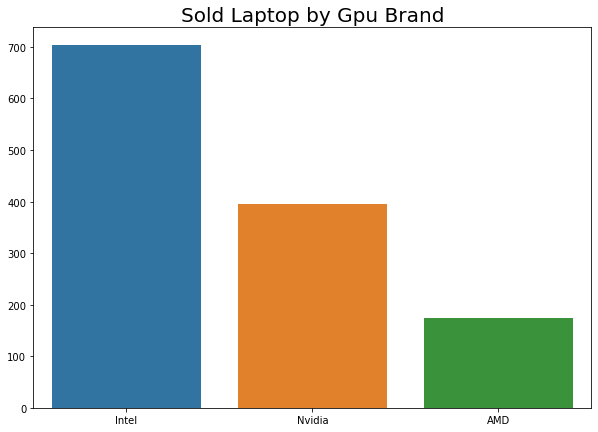

In [61]:
plt.figure(figsize = (10,7))
sns.barplot(x = data["Gpu brand"].value_counts().index,y = data["Gpu brand"].value_counts().values)
plt.title("Sold Laptop by Gpu Brand",fontsize = 20);

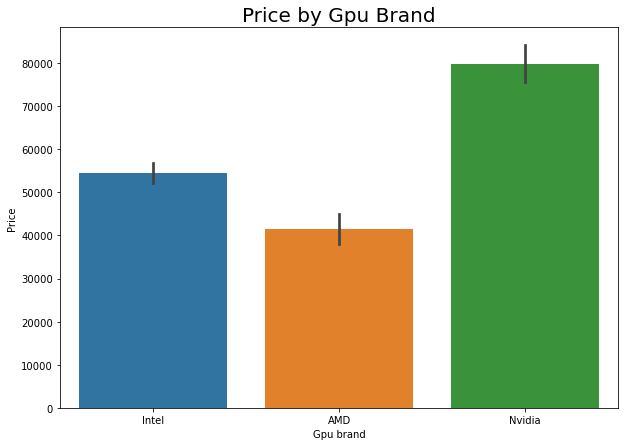

In [62]:
plt.figure(figsize = (10,7))
sns.barplot(x = data["Gpu brand"],y = data["Price"])
plt.title("Price by Gpu Brand",fontsize = 20);

In [63]:
data["OpSys"].value_counts()

Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [64]:
def osystem (os):
    if os == "Windows 10" or os == "Windows 7" or os == "Windows 10 S":
        return "windows"
    elif os == "macOS" or os == "Mac OS X":
        return "mac"
    else:
        return "no os/linux/chrome os"

In [65]:
data["OS"] = data["OpSys"].apply(osystem)

In [66]:
data.sample(4)

,Company,TypeName,Inches,Ram,Memory,OpSys,Weight,Price,Touch_Screen,IPS,PPI,Cpu Brand,Gpu brand,OS
1236,HP,Ultrabook,14.0,8,256GB SSD,Windows 7,1.54,117119,0,0,209.800683,Intel Core i7,Intel,windows
247,Asus,Gaming,17.3,16,256GB SSD,Windows 10,3.60,159786,0,0,127.335675,Intel Core i7,Nvidia,windows
227,Asus,Notebook,15.6,8,256GB SSD,Windows 10,2.00,40972,0,0,141.211998,Intel Core i5,Nvidia,windows
150,Dell,Gaming,15.6,16,512GB SSD,Windows 10,2.56,66560,0,0,141.211998,Intel Core i7,Nvidia,windows


In [67]:
data = data.drop(["OpSys","Memory"],axis = 1)

In [68]:
data["OS"].value_counts()

windows                  1100
no os/linux/chrome os     152
mac                        21
Name: OS, dtype: int64

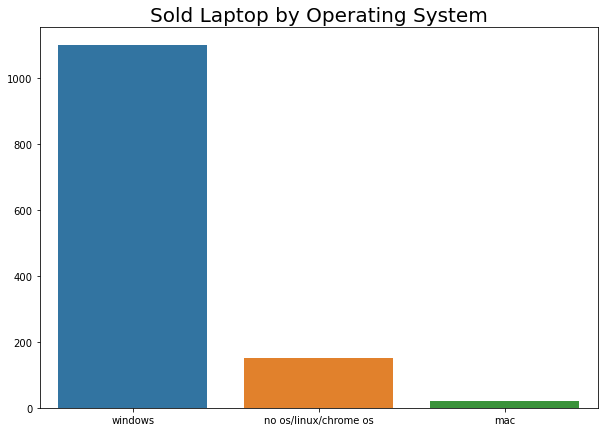

In [69]:
plt.figure(figsize = (10,7))
sns.barplot(x = data["OS"].value_counts().index,y = data["OS"].value_counts().values)
plt.title("Sold Laptop by Operating System",fontsize = 20);

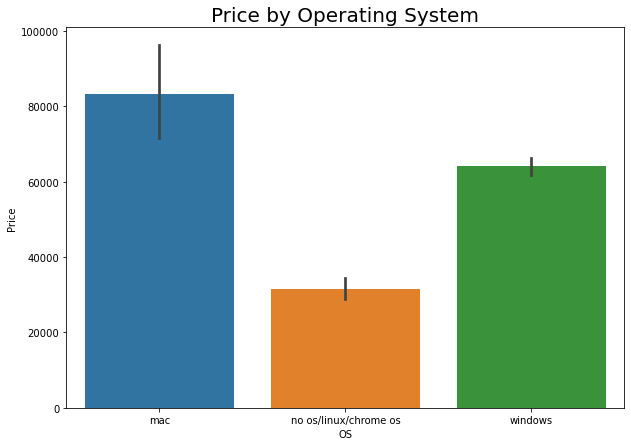

In [70]:
plt.figure(figsize = (10,7))
sns.barplot(x = data["OS"],y = data["Price"])
plt.title("Price by Operating System",fontsize = 20);

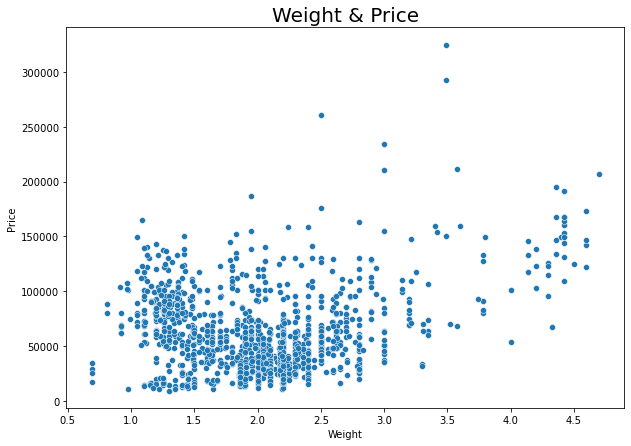

In [71]:
plt.figure(figsize = (10,7))
sns.scatterplot(x = data["Weight"],y = data["Price"])
plt.title("Weight & Price",fontsize = 20);

# Model Building

In [72]:
# seperating data for target and independent variable
y = data["Price"]
x = data.drop("Price",axis = 1)

In [73]:
x

,Company,TypeName,Inches,Ram,Weight,Touch_Screen,IPS,PPI,Cpu Brand,Gpu brand,OS
0,Apple,Ultrabook,13.3,8,1.37,0,1,226.983005,Intel Core i5,Intel,mac
1,Apple,Ultrabook,13.3,8,1.34,0,0,127.677940,Intel Core i5,Intel,mac
2,HP,Notebook,15.6,8,1.86,0,0,141.211998,Intel Core i5,Intel,no os/linux/chrome os
3,Apple,Ultrabook,15.4,16,1.83,0,1,220.534624,Intel Core i7,AMD,mac
4,Apple,Ultrabook,13.3,8,1.37,0,1,226.983005,Intel Core i5,Intel,mac
...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,15.6,4,2.20,0,0,100.454670,Intel Core i7,Nvidia,windows
1270,Lenovo,2 in 1 Convertible,14.0,4,1.80,1,1,157.350512,Intel Core i7,Intel,windows
1271,Lenovo,2 in 1 Convertible,13.3,16,1.30,1,1,276.053530,Intel Core i7,Intel,windows
1272,Lenovo,Notebook,14.0,2,1.50,0,0,111.935204,Other Intel Processor,Intel,windows


In [74]:
y

0        71378
1        47895
2        30636
3       135195
4        96095
         ...  
1269     38378
1270     33992
1271     79866
1272     12201
1273     40705
Name: Price, Length: 1273, dtype: int64

In [75]:
#splitting data into train test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [76]:
x_train

,Company,TypeName,Inches,Ram,Weight,Touch_Screen,IPS,PPI,Cpu Brand,Gpu brand,OS
567,Fujitsu,Notebook,15.6,8,2.20,0,0,100.454670,Intel Core i5,Intel,windows
545,HP,Notebook,15.6,4,2.10,0,0,141.211998,Intel Core i3,Intel,windows
644,Acer,Notebook,15.6,4,2.40,0,0,100.454670,Intel Core i3,Intel,windows
909,LG,Ultrabook,14.0,8,0.98,1,1,157.350512,Intel Core i7,Intel,windows
802,Dell,Ultrabook,13.3,8,1.29,0,0,165.632118,Intel Core i5,Intel,windows
...,...,...,...,...,...,...,...,...,...,...,...
1044,HP,Notebook,14.0,4,1.54,0,0,157.350512,Intel Core i5,Intel,windows
1095,Acer,Notebook,15.6,8,2.40,0,0,141.211998,Intel Core i5,Nvidia,windows
1130,HP,Notebook,15.6,8,2.04,0,0,100.454670,Intel Core i7,Intel,windows
860,Lenovo,Notebook,15.6,8,2.30,0,1,141.211998,Intel Core i5,Intel,windows


In [77]:
x_test

,Company,TypeName,Inches,Ram,Weight,Touch_Screen,IPS,PPI,Cpu Brand,Gpu brand,OS
43,Acer,Notebook,15.6,4,2.20,0,1,141.211998,Intel Core i5,Intel,windows
1160,Lenovo,Ultrabook,14.0,8,1.70,0,0,157.350512,Intel Core i7,Intel,windows
128,Dell,Notebook,17.3,16,2.80,0,0,127.335675,Intel Core i7,AMD,windows
1233,MSI,Gaming,17.3,16,2.70,0,0,127.335675,Intel Core i7,Nvidia,windows
1194,Dell,2 in 1 Convertible,13.3,8,1.60,1,1,165.632118,Intel Core i5,Intel,windows
...,...,...,...,...,...,...,...,...,...,...,...
579,Dell,Notebook,15.6,8,2.20,0,0,141.211998,Intel Core i7,AMD,no os/linux/chrome os
630,Asus,Ultrabook,14.0,16,1.10,0,0,157.350512,Intel Core i7,Intel,windows
5,Acer,Notebook,15.6,4,2.10,0,0,100.454670,AMD Processor,AMD,windows
100,HP,Notebook,15.6,8,1.91,0,0,141.211998,Intel Core i7,AMD,windows


In [78]:
# importing one hot encoder to encode the categorical column

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop = "first")

In [79]:
# converting categorical column into numeric

x_train_new = ohe.fit_transform(x_train[["Company","TypeName","Cpu Brand","Gpu brand","OS"]]).toarray()
x_test_new = ohe.transform(x_test[["Company","TypeName","Cpu Brand","Gpu brand","OS"]]).toarray()

In [80]:
# adding converted column into data

x_train = np.hstack((x_train[["Inches","Ram","Weight","Touch_Screen","IPS","PPI"]].values,x_train_new))
x_test =  np.hstack((x_test[["Inches","Ram","Weight","Touch_Screen","IPS","PPI"]].values,x_test_new))


In [81]:
# importing machine learning model

from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [82]:
# fitting data into model

reg.fit(x_train,y_train)

LinearRegression()

In [83]:
# testing model

y_pred = reg.predict(x_test)

In [84]:
# importing mean_absolute_error,r2_score,mean_squared_error for model evaluation

from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [85]:
# evaluating the model

print("MAE -->",mean_absolute_error(y_test,y_pred))
print("R2 Score -->",r2_score(y_test,y_pred))
print("RMSE -->",np.sqrt(mean_squared_error(y_test,y_pred)))

MAE --> 14028.037194369124
R2 Score --> 0.7085316873603243
RMSE --> 20589.89067096226


### R2 score is good but MAE and RMSE are not acceptable

### I observed while performing EDA that price column was positively skewed that's why going to apply log transformation for reducing error

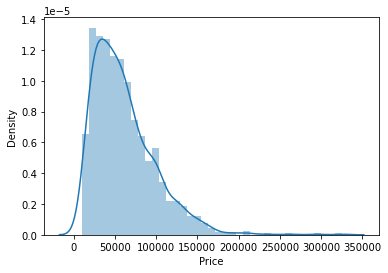

In [86]:
sns.distplot(y);

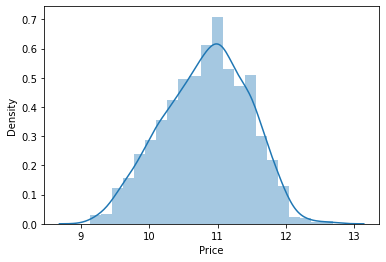

In [87]:
#target column is positively skewed it should be normally distributed that's why applying log transformation

sns.distplot(np.log(y));

In [88]:
# seperating data for target and independent variable
y_new = np.log(data["Price"])
x_new = data.drop("Price",axis = 1)

In [89]:
#splitting data into train test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x_new,y_new,test_size = 0.3,random_state = 42)

In [90]:
# transforming categorical column into numeric

x_train_new = ohe.fit_transform(x_train[["Company","TypeName","Cpu Brand","Gpu brand","OS"]]).toarray()
x_test_new = ohe.transform(x_test[["Company","TypeName","Cpu Brand","Gpu brand","OS"]]).toarray()

In [91]:
# adding encoded columns to data

x_train = np.hstack((x_train[["Inches","Ram","Weight","Touch_Screen","IPS","PPI"]].values,x_train_new))
x_test =  np.hstack((x_test[["Inches","Ram","Weight","Touch_Screen","IPS","PPI"]].values,x_test_new))


In [92]:
# fitting data into model
reg.fit(x_train,y_train)

LinearRegression()

In [93]:
# testing model 

y_pred = reg.predict(x_test)

In [94]:
# evaluating the model

print("MAE -->",mean_absolute_error(y_test,y_pred))
print("R2 Score -->",r2_score(y_test,y_pred))
print("RMSE -->",np.sqrt(mean_squared_error(y_test,y_pred)))

MAE --> 0.22034593615296844
R2 Score --> 0.7909494252799832
RMSE --> 0.28744586964039365


### After log transformation model accuracy has been increased

In [95]:
# will try to inhance the model accuracy by scalling down the features for

In [96]:
#importing standard scaler for scalling the feature

from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

In [97]:
# Scalling down the feature

x_train = Scaler.fit_transform(x_train)
x_test =  Scaler.transform(x_test)

In [98]:
# fitting data into model after Scalling

reg.fit(x_train,y_train)

LinearRegression()

In [99]:
# testing the model

y_pred = reg.predict(x_test)

In [100]:
#evaluating the model
print("MAE -->",mean_absolute_error(y_test,y_pred))
print("R2 Score -->",r2_score(y_test,y_pred))
print("RMSE -->",np.sqrt(mean_squared_error(y_test,y_pred)))

MAE --> 0.22034800238845675
R2 Score --> 0.7909121773672864
RMSE --> 0.2874714765582194


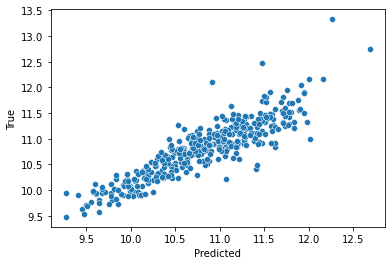

In [103]:
#justifying error

sns.scatterplot(y_test,y_pred)
plt.xlabel("Predicted")
plt.ylabel("True");